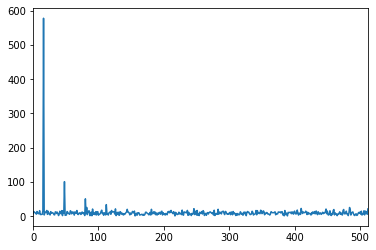

In [3]:
## Discrete Fourier Transform

from numpy import zeros
from cmath import exp, pi

def dft (x):
  N = len (x)
  c = zeros (N//2 + 1, complex)
  for k in range (N//2 + 1):
    for n in range (N):
      c[k] += x[n] * exp (-2j * pi * k * n / N)
  return c

'''
* Copy the file pitch.txt 
https://www.cs.utexas.edu/users/mitra/csSpring2022/cs323/notes/pitch.txt

* Plot the signal. Join all the observed points by a line.

* Assume that the 1024 observations are equally spaced.

* Compute the Discrete Fourier Transform and plot the power spectrum
'''


from numpy import loadtxt
from pylab import plot, xlim, show

def main():
  x = loadtxt ("./pitch.txt", float)
  c = dft (x)
  plot (abs(c))
  xlim (0, 512)
  show()

main()

In [ ]:
'''
* The SciPy module scipy.fft has a more comprehensive set of routines
  compared to NumPy.

* Summary of selected functions from the fftpack module in SciPy.
  fft, ifft -> general FFT and inverse FFT of a real or complex signal
  rfft, irfft -> FFT and inverse FFT of a real valued signal
  dct, idct -> discrete cosine transform and its inverse
  dst, idst -> discrete sine transform and its inverse

* Waveform of a single note played on the piano:
https://www.cs.utexas.edu/users/mitra/csSpring2022/cs323/notes/piano.txt

* Waveform of the same note played on the trumpet:
https://www.cs.utexas.edu/users/mitra/csSpring2022/cs323/notes/trumpet.txt

* Fourier Transforms of Musical Instruments
  Write a program that loads a waveform. Plot the waveform and then 
  calculate the discrete Fourier transform. Plot the magnitudes of the
  first 10,000 coefficients. You will have to use the Fast Fourier
  Transform for the calculation because there are too many samples in
  the files.

  Apply your program to the piano and trumpet waveforms and discuss
  briefly what you can conclude about the sound of the piano and trumpet
  from the plots of the Fourier coefficients.

  Both waveforms were recorded at the industry standard rate of 44,100
  samples per second and both instruments were playing the same musical
  note when the recordings were made. From your Fourier transform results
  calculate what note they were playing. The musical note middle C has
  a frequency of 261 Hz.

* Here are some DFT and FFT functions (the algorithms) that you may want to try
'''

In [ ]:

import numpy as np

def dft (x):
  x = np.asarray (x, dtype = float)
  N = x.shape[0]
  n = np.arange (N)
  k = n.reshape ((N, 1))
  M = np.exp (-2j * np.pi * k * n / N)
  return np.dot (M, x)

# recursive solution to FFT
def fft (x):
  x = np.asarray (x, dtype = float)
  N = x.shape[0]
  if (N % 2 > 0):
    raise ValueError ("must be a power of 2")
  elif (N <= 2):
    return dft (x)
  else:
    X_even = fft (x[::2])
    X_odd = fft (x[1::2])
    terms = np.exp (-2j * np.pi * np.arange(N) / N)
    return np.concatenate ([X_even + terms[:int(N/2)] * X_odd, \
                            X_even + terms[int(N/2):] * X_odd)

# non-recursive solution to FFT using vector operations
def fft_v (x):
  x = np.asarray (x, dtype = float)
  N = x.shape[0]
  if (np.log2(N) % 2 > 0):
    raise ValueError ("must be a power of 2")

  N_min = min (N, 2)

  n = np.arange (N_min)
  k = n[:, None]
  M = np.exp (-2j * np.pi * n * k / N_min)
  X = np.dot (M, x.reshape((N_min, -1)))

  while (X.shape[0] < N):
    X_even = X[:, :int(X.shape[1] / 2)]
    X_odd = X[:, int(X.shape[1] / 2):]
    terms = np.exp (-1j * np.pi * np.arange(X.shape[0]) / X.shape[0])[:,None]
    X = np.vstack([X_even + terms * X_odd, X_even - terms * X_odd])

  return X.ravel()

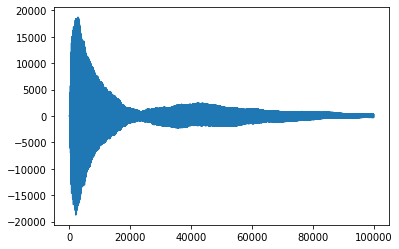

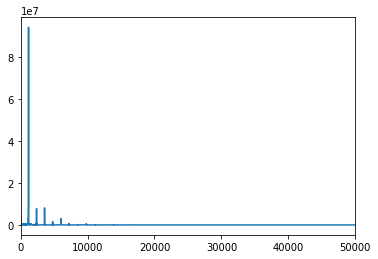

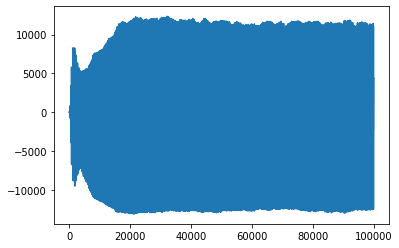

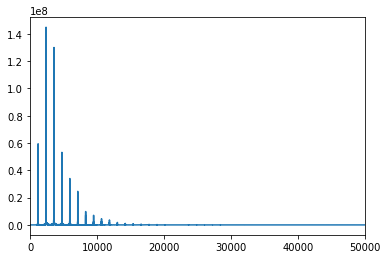

In [16]:
## Fast Fourier Transform
## Using numpy functions
from numpy import zeros
from cmath import exp, pi

from numpy import loadtxt, fft
from pylab import plot, xlim, show

def main():
  x = loadtxt ("./piano.txt", float)
  plot(x)
  show()
  c = fft.fft (x)
  plot (abs(c))
    # lim is length of piano.txt squared and divided in half, it repeats pass that
  xlim (0, 50000)
  show()

  y = loadtxt ("./trumpet.txt", float)
  plot(y)
  show()
  b = fft.fft (y)
  plot (abs(b))
  xlim (0, 50000)
  show()


main()